# 1. Pandas profiling

In [33]:
%matplotlib inline
import pandas as pd
import pandas_profiling

In [46]:
df=pd.read_table("../Documents/MERCARI/train.tsv", parse_dates=True, encoding='UTF-8')

In [52]:
df.head()

,test_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


## 1.1 Testing out the report

In [23]:
pandas_profiling.ProfileReport(df)

Number of variables,8
Number of observations,1482535
Total Missing (%),0.0%
Total size in memory,90.5 MiB
Average record size in memory,64.0 B
Numeric,3
Categorical,4
Boolean,1
Date,0
Text (Unique),0
Rejected,0


## 1.2 Confirming values in the report

In [24]:
df.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

In [28]:
print "Missing brand name proportion:" 
print float(df[:400000]["brand_name"].isnull().sum())/len(df)
print "Missing category name percent:"
print float(df[:400000]["category_name"].isnull().sum())/len(df)

Missing brand name proportion:
0.115081937357
Missing category name percent:
0.00115882592991


In [30]:
print df["brand_name"].describe()
print df["category_name"].describe()
print df["name"].describe()

count     849853
unique      4809
top         PINK
freq       54088
Name: brand_name, dtype: object
count                                            1476208
unique                                              1287
top       Women/Athletic Apparel/Pants, Tights, Leggings
freq                                               60177
Name: category_name, dtype: object
count     1482535
unique    1225273
top        Bundle
freq         2232
Name: name, dtype: object


# 1.3 Adding histograms for numeric variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11075bf10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x114bf6f10>]], dtype=object)

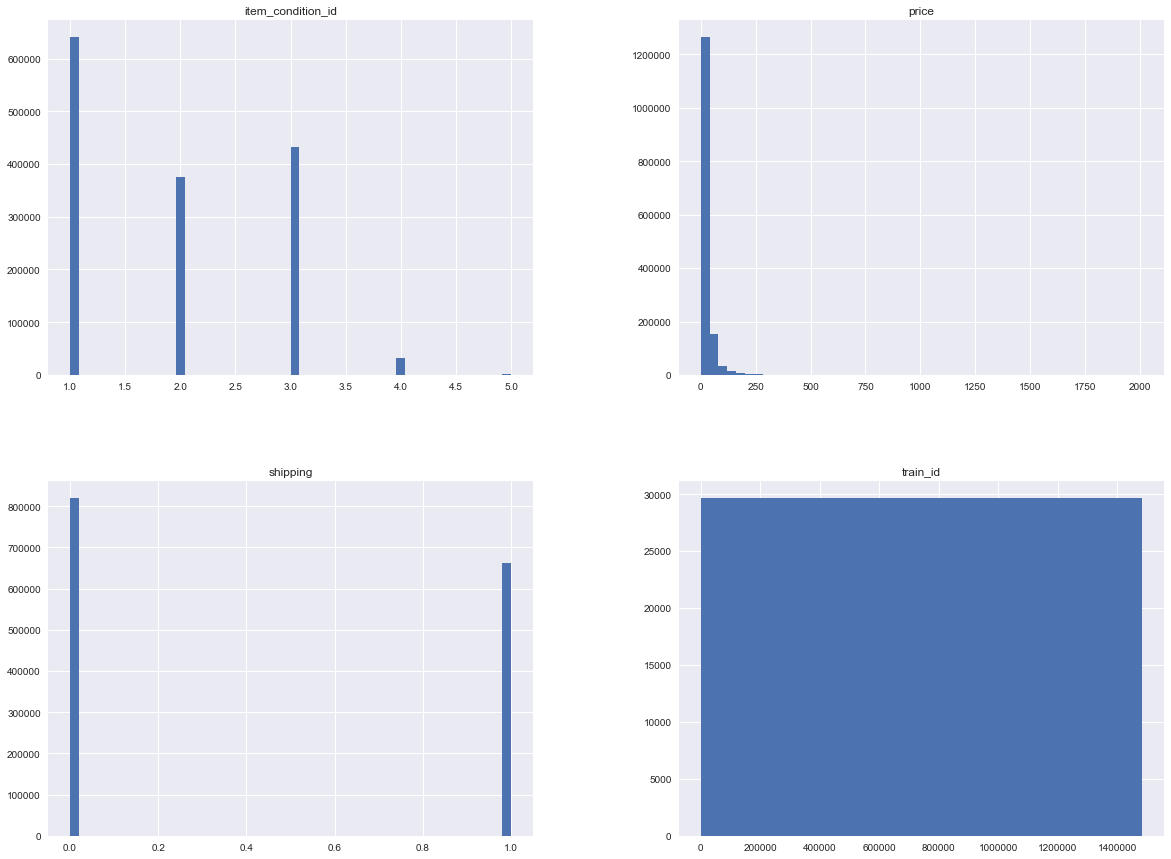

In [34]:
df.hist(bins=50, figsize=(20,15))

# 2. SpeedML

In [ ]:
from speedml import Speedml

In [ ]:
df= df.rename(index=str, columns={"train_id":"test_id"})
df.to_csv("../Documents/MERCARI/train2.csv", encoding='UTF-8')
testset=pd.read_table("../Documents/MERCARI/test.tsv", parse_dates=True, encoding='UTF-8')
testset.to_csv("../Documents/MERCARI/test2.csv", encoding='UTF-8')

In [59]:
sml = Speedml('../Documents/MERCARI/train2.csv',
              '../Documents/MERCARI/test2.csv',
              target='price', uid='test_id')
sml.eda()

,Results,Observations
Speedml Release,v0.9.3,Visit https://speedml.com for release notes.
Nulls,928207,Use feature.impute.
Outliers Upper,[price],Positive skew (> 3). Use feature.outliers(upper).
Shape,"train (1482535, 8) | test (693359, 7)",
Numerical Ratio,50%,Aim for 100% numerical.
Numerical High-cardinality,[price],(>10) categories. Use feature.density
Numerical Categorical,"[item_condition_id, shipping]",Use plot.ordinal.
Numerical Continuous,[Unnamed: 0],~80% unique. Use plot.continuous.
Text High-cardinality,"[category_name, brand_name]",(>10) categories. Use feature.labels.
Text Unique,"[name, item_description]",~80% unique. Use feature.extract or feature.drop.


In [60]:
#Replacing empty values in the entire dataframe with median value for numerical features 
#and most common values for text features:

sml.feature.impute()

u'Imputed 639013 empty values to 0.'

In [ ]:
# Normalizing price
feature.outliers(upper)

In [ ]:
# Create density features for High-cardinality text features
text_high_cardinality = sml.eda().get_value('Text High-cardinality', 'Results')
sml.feature.density(text_high_cardinality)